In [1]:
import matplotlib as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
def get_review_data(review_file):
    f = open(review_file, "r")
    data = {}
    for line in f:
        #find the product title
        if line.startswith("product/title: "):
            product = line.strip("product/title: ")
            product = product.strip()
            #if new product, add to the opinion dictionary
            if not product in data:
                data[product] = {"scores": []}
        if line.startswith("product/price: "):
            if not "Price" in data[product]:
                data[product]["Price"] = line.strip("product/price:")
                data[product]["Price"] =data[product]["Price"].strip()
        if line.startswith("review/score:"):
            score = line.strip("review/score:")
            score = float(score.strip())
            data[product]["scores"].append(score)
    f.close()
    
    for product in data:
        score_series = pd.Series(data[product]["scores"])
        data[product]["Number of reviews"] = score_series.size
        data[product]["Mean score"] = score_series.mean()
    df = pd.DataFrame(data)
    df = df.transpose()
    df["Product"] = df.index
    df.index = range(len(df))
    df = df.drop(["scores"],1)
    df = df[["Product", "Price", "Number of reviews", "Mean score"]]
    df_amazon = df
    
    return df_amazon

In [3]:
get_review_data('reviews.txt')

,Product,Price,Number of reviews,Mean score
0,Fisher-Price Rescue Heroes: Lava Landslide,8.88,7,2.28571
1,Barbie as Rapunzel: A Creative Adventure,unknown,55,4.16364
2,Kelly Club Pet Parade,2.95,15,4.53333


In [4]:
df = pd.read_csv("multidimensional_poverty.csv") 
pd.options.display.max_columns = None

In [5]:
df

,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,Afghanistan,2010/2011 M,0.293,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,..
1,Albania,2008/2009 D,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
2,Argentina,2005 N,0.015,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,..,1.4
3,Armenia,2010 D,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,2006 D,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3
5,Bangladesh,2011 D,0.237,49.5,0.253,51.3,"75,610",47.8,28.4,26.6,44.9,31.5,43.3
6,Barbados,2012 M,0.004,1.2,0.003,0.9,3,33.7,1.5,95.9,2.6,..,..
7,Belarus,2005 M,0.001,0.4,0.000,0.0,41,34.5,2.6,89.7,7.7,5.5,0.0
8,Belize,2011 M,0.030,7.4,0.018,4.6,23,41.2,36.2,34.8,29.0,..,..
9,Benin,2011/2012 D,0.343,64.2,0.307,62.2,"6,455",53.3,33.1,24.8,42.1,36.2,51.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
Country                                       101 non-null object
Year and Survey                               101 non-null object
Multidimensional Poverty Index (MPI, HDRO)    101 non-null float64
MPI HDRO Percent                              101 non-null float64
Multidimensional Poverty Index (MPI, 2010)    99 non-null float64
MPI 2010 Percent                              99 non-null float64
Population in Multidimensional Poverty        101 non-null object
Intensity of Deprivation                      101 non-null float64
Education Deprivation                         101 non-null float64
Health Deprivation                            101 non-null float64
Living Standards                              101 non-null float64
Population Below National Poverty Line        101 non-null object
Population Below $1.25 per Day                101 non-null object
dtypes: float64(8), object(5)
m

In [7]:
df.describe()

,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards
count,101.000000,101.000000,99.000000,99.000000,101.000000,101.000000,101.000000,101.000000
mean,0.170149,32.599010,0.172949,32.497980,45.852475,25.306931,38.507921,36.189109
std,0.169847,29.718097,0.176056,29.931844,7.588631,11.511214,19.097983,14.060227
min,0.001000,0.400000,0.000000,0.000000,33.700000,1.500000,12.600000,2.600000
25%,0.015000,3.700000,0.015000,3.900000,39.100000,17.900000,25.700000,29.400000
50%,0.127000,26.900000,0.119000,27.200000,45.100000,26.400000,30.400000,40.000000
75%,0.290000,55.600000,0.309500,58.250000,50.800000,33.700000,47.100000,46.400000
max,0.584000,89.800000,0.605000,91.100000,65.000000,54.700000,95.900000,56.600000


In [8]:
df.columns = ['Country','Year','MPI', 'MPI%', 'MPI_2010','MPI_2010%','Pop_In_Poverty',
              'Intensity_Deprivation','Education_Deprivation','Health_Deprivation','Living_Standards',
              'Pop_Below_poverty','Pop_Below_1.25']

In [9]:
df['Pop_In_Poverty'] = df['Pop_In_Poverty'].str.replace(',', '')
df['Pop_In_Poverty'] = df['Pop_In_Poverty'].astype(float)

df['Pop_Below_poverty'] = df['Pop_Below_poverty'].str.replace('..', '0')
df['Pop_Below_poverty'] = df['Pop_Below_poverty'].astype(float)

df['Pop_Below_1.25'] = df['Pop_Below_1.25'].str.replace('..', '0')
df['Pop_Below_1.25'] = df['Pop_Below_1.25'].astype(float)

df = df.drop(df.columns[[1,2,3,4,5]], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
Country                  101 non-null object
Pop_In_Poverty           101 non-null float64
Intensity_Deprivation    101 non-null float64
Education_Deprivation    101 non-null float64
Health_Deprivation       101 non-null float64
Living_Standards         101 non-null float64
Pop_Below_poverty        101 non-null float64
Pop_Below_1.25           101 non-null float64
dtypes: float64(7), object(1)
memory usage: 6.4+ KB


In [11]:
df.head()

,Country,Pop_In_Poverty,Intensity_Deprivation,Education_Deprivation,Health_Deprivation,Living_Standards,Pop_Below_poverty,Pop_Below_1.25
0,Afghanistan,17116.0,49.9,45.6,19.2,35.2,0.0,0.0
1,Albania,38.0,38.3,22.4,47.1,30.5,0.0,5.0
2,Argentina,1438.0,39.1,38.2,27.8,34.0,0.0,4.0
3,Armenia,18.0,37.0,3.4,87.8,8.7,0.0,8.0
4,Azerbaijan,210.0,38.2,20.0,50.7,29.3,3.0,3.0


In [12]:
pca_features = ['Pop_In_Poverty','Intensity_Deprivation','Education_Deprivation','Health_Deprivation','Living_Standards']

In [13]:
x = df.loc[:,pca_features].values
y = df.loc[:,['Country']].values

x = StandardScaler().fit_transform(x)

In [14]:
df2 = pd.DataFrame(data = x, columns = pca_features)

In [15]:
df2.head()

,Pop_In_Poverty,Intensity_Deprivation,Education_Deprivation,Health_Deprivation,Living_Standards
0,0.032695,0.536027,1.771688,-1.016035,-0.070699
1,-0.233254,-1.000199,-0.253790,0.452138,-0.406642
2,-0.211452,-0.894253,1.125631,-0.563480,-0.156472
3,-0.233565,-1.172363,-1.912587,2.593883,-1.964848
4,-0.230575,-1.013443,-0.463322,0.641580,-0.492415


In [16]:
df2.head()

,Pop_In_Poverty,Intensity_Deprivation,Education_Deprivation,Health_Deprivation,Living_Standards
0,0.032695,0.536027,1.771688,-1.016035,-0.070699
1,-0.233254,-1.000199,-0.253790,0.452138,-0.406642
2,-0.211452,-0.894253,1.125631,-0.563480,-0.156472
3,-0.233565,-1.172363,-1.912587,2.593883,-1.964848
4,-0.230575,-1.013443,-0.463322,0.641580,-0.492415


In [17]:
pca = PCA(n_components=2)

p_components = pca.fit_transform(x)

p_df = pd.DataFrame(data = p_components, columns = ['p_component 1', 'p_component 2'])

In [18]:
df.set_index('Country')
df3 = pd.concat([p_df, df[['Country']]], axis = 1)
df3

,p_component 1,p_component 2,Country
0,-1.506738,-0.911515,Afghanistan
1,1.102894,-0.189562,Albania
2,-0.187279,-0.885530,Argentina
3,3.820969,0.495460,Armenia
4,1.340352,-0.085039,Azerbaijan
5,-1.015541,0.746665,Bangladesh
6,4.570036,0.493877,Barbados
7,4.111856,0.499149,Belarus
8,0.124965,-0.834690,Belize
9,-1.377047,-0.350713,Benin


In [19]:
pca.explained_variance_ratio_

array([0.55524595, 0.20484813])

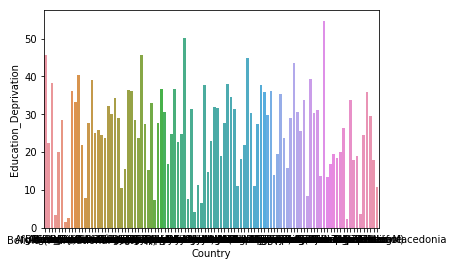

In [20]:
bar1 = sns.barplot(x='Country', y='Education_Deprivation',data = df)

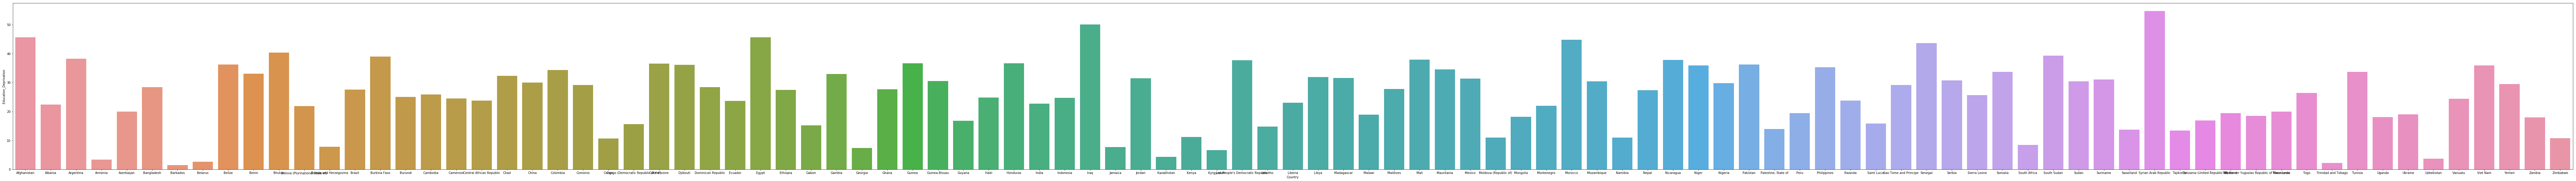

In [28]:
bar1 = sns.barplot(x='Country', y='Education_Deprivation',data = df)
plt.rcParams['figure.figsize'] = (150,10)

In [22]:
df.head()

,Country,Pop_In_Poverty,Intensity_Deprivation,Education_Deprivation,Health_Deprivation,Living_Standards,Pop_Below_poverty,Pop_Below_1.25
0,Afghanistan,17116.0,49.9,45.6,19.2,35.2,0.0,0.0
1,Albania,38.0,38.3,22.4,47.1,30.5,0.0,5.0
2,Argentina,1438.0,39.1,38.2,27.8,34.0,0.0,4.0
3,Armenia,18.0,37.0,3.4,87.8,8.7,0.0,8.0
4,Azerbaijan,210.0,38.2,20.0,50.7,29.3,3.0,3.0


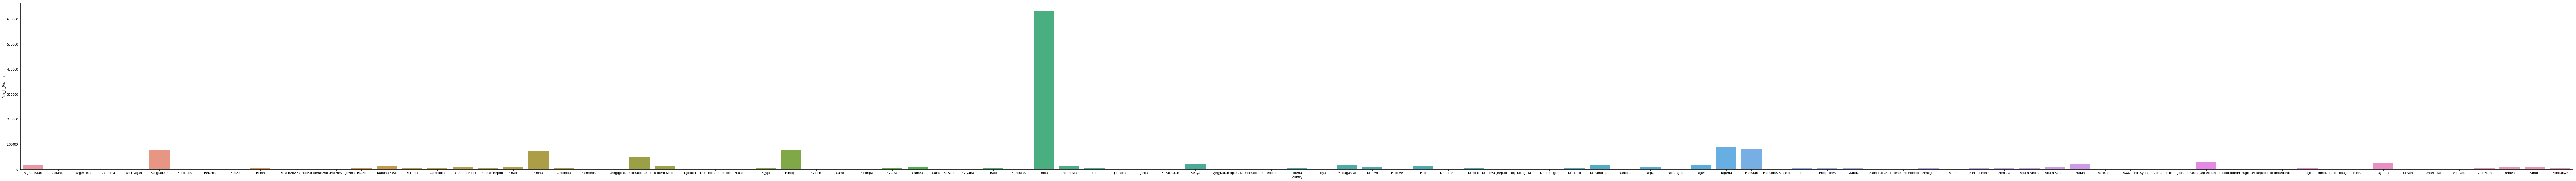

In [23]:
bar1 = sns.barplot(x='Country', y='Pop_In_Poverty',data = df)


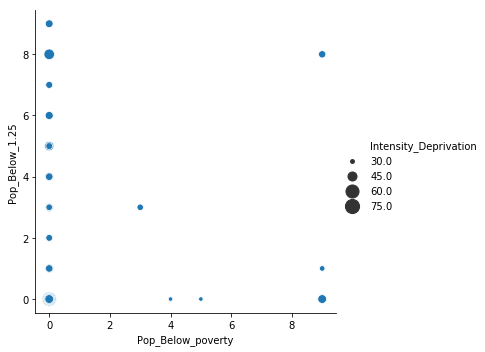

In [24]:
sns.relplot(x="Pop_Below_poverty", y="Pop_Below_1.25", size="Intensity_Deprivation", sizes=(15, 200), data=df)

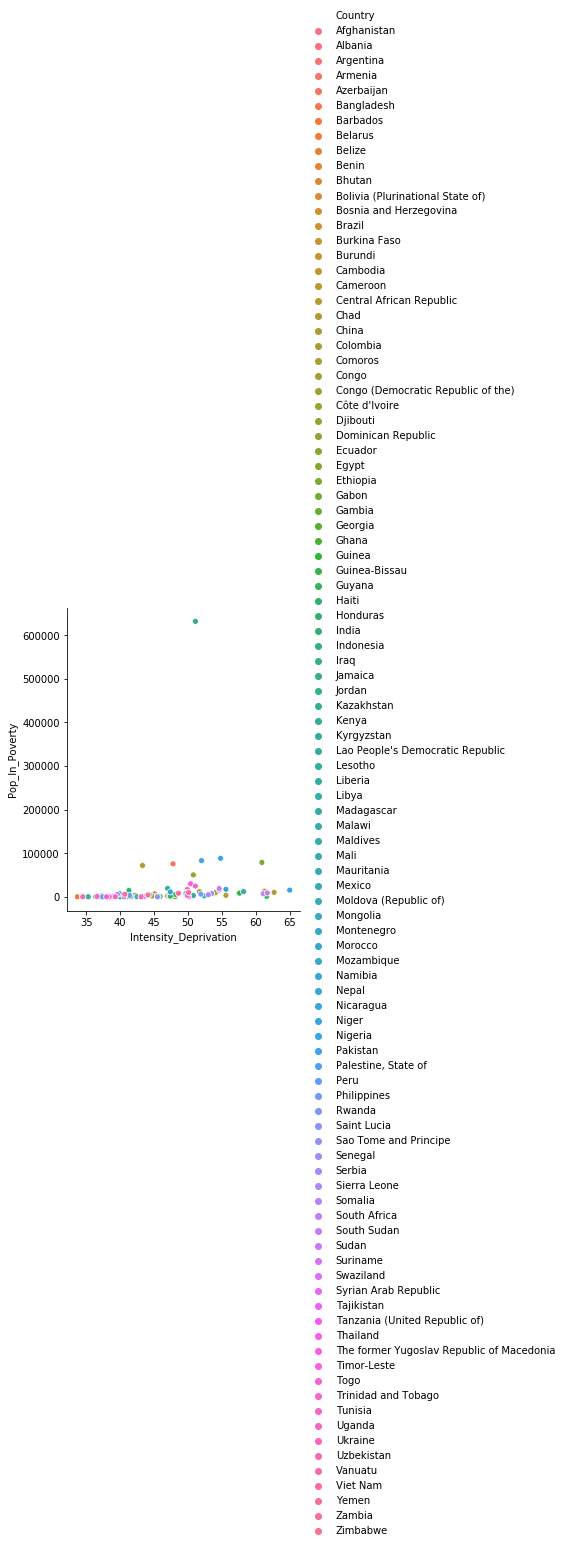

In [25]:
sns.relplot(x="Intensity_Deprivation", y="Pop_In_Poverty", hue="Country", data=df)
plt.rcParams['figure.figsize'] = (10,10)

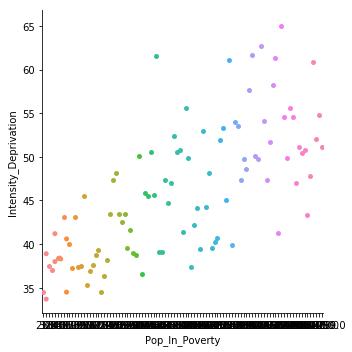

In [26]:
sns.catplot(x="Pop_In_Poverty", y="Intensity_Deprivation", kind="swarm", data=df);
plt.rcParams['figure.figsize'] = (150,10)

D:\School\Spring2019\IntroPython\PythonInstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


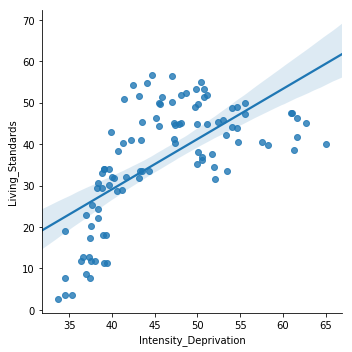

In [27]:
sns.lmplot(x='Intensity_Deprivation', y='Living_Standards',data = df,legend = 'Intensity_Deprivation')